### Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

### Exploratory Data Analysis on the given dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import pickle

In [26]:
data = pd.read_csv("sample30.csv")

In [28]:
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [30]:
data.size

450000

In [32]:
#Removing null usernames
data = data[~data['reviews_username'].isna()]

In [34]:
data['reviews_username'].nunique()

24914

In [36]:
# Remove the missing row of user_sentiment
data = data[~data.user_sentiment.isnull()]

In [38]:
#get the value count of user_sentiments column
data["user_sentiment"].value_counts(normalize=True)

user_sentiment
Positive    0.887861
Negative    0.112139
Name: proportion, dtype: float64

User setntiment is catelogorical variable with positive and negative sentiments and highly skewed towards positive sentiments

In [41]:
#map the categorical user_sentiment to numerical 1 or 0 for modelling
data['user_sentiment'] = data['user_sentiment'].map({'Positive':1,'Negative':0})

In [43]:
#Remove all nulls for review ratings
data = data[~data['reviews_rating'].isna()]

In [45]:
data['reviews_rating'].value_counts()

reviews_rating
5    20791
4     6010
1     1373
3     1344
2      418
Name: count, dtype: int64

Again skew towards high rating (>=4)

In [48]:
##Finally checking other missing values
data.isna().sum() 

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title             189
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
dtype: int64

In [50]:
#Check how many brands are there
data['brand'].value_counts()

brand
Clorox                   10565
Warner Home Video         3325
Disney                    1199
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
SLOAN VALVE COMPANY          1
Southern Enterprises         1
Universal Music              1
Name: count, Length: 214, dtype: int64

214 distinct brands

In [53]:
#Checking the manufacturers
data['manufacturer'].value_counts()

manufacturer
Clorox                                8526
Test                                  3325
AmazonUs/CLOO7                        2039
L'oreal Paris                         1232
Walt Disney                           1142
                                      ... 
Pacific Foods of Oregon, Inc.            1
Unfi                                     1
Herr's                                   1
Southern Enterprises                     1
Universal Music Group / Cash Money       1
Name: count, Length: 227, dtype: int64

227 manufacturers are there

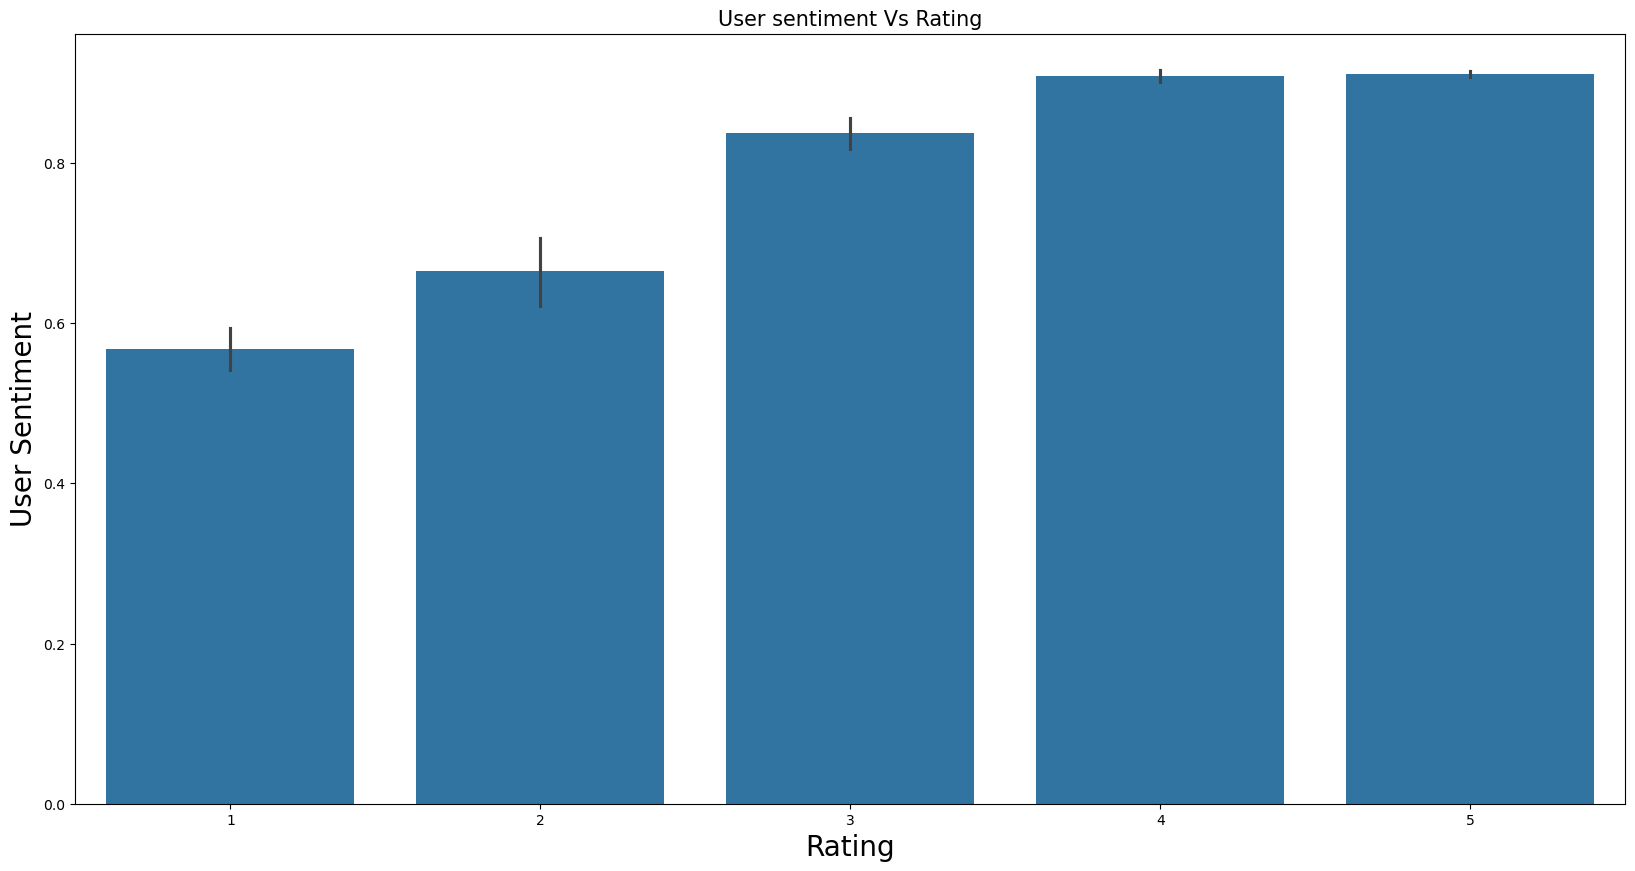

In [56]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data =data,x='reviews_rating', y='user_sentiment')
ax.set_xlabel('Rating',size = 20)
ax.set_ylabel('User Sentiment',size = 20)
ax.set_title( "User sentiment Vs Rating",size = 15)
plt.show()

Looks like there are many review with low rating but positive user sentiment

In [59]:
data_to_fix = data[(data["user_sentiment"]==1) & (data["reviews_rating"]<3)]

In [61]:
data_to_fix[['reviews_rating','user_sentiment','reviews_text']]

,reviews_rating,user_sentiment,reviews_text
9,1,1,Got as a surprise for my husband there is noth...
11,1,1,Purchased this thinking it would have some sor...
14,1,1,First time purchase of this type of product. M...
54,1,1,I used (and loved) this product for several ye...
56,1,1,I am so disappointed! I have used this product...
...,...,...,...
28869,2,1,This was the last step out of the three step p...
28870,2,1,"I have been a big LOral fan, using their produ..."
28871,2,1,Despite using this with the line's hair mask a...
28872,2,1,I tried out this whole set.i wanted it to work...


In [63]:
data.loc[(data["user_sentiment"]==1) & (data["reviews_rating"]<3), "user_sentiment"] = 0

In [65]:
data.loc[(data["user_sentiment"]==0) & (data["reviews_rating"]>3), "user_sentiment"] = 1

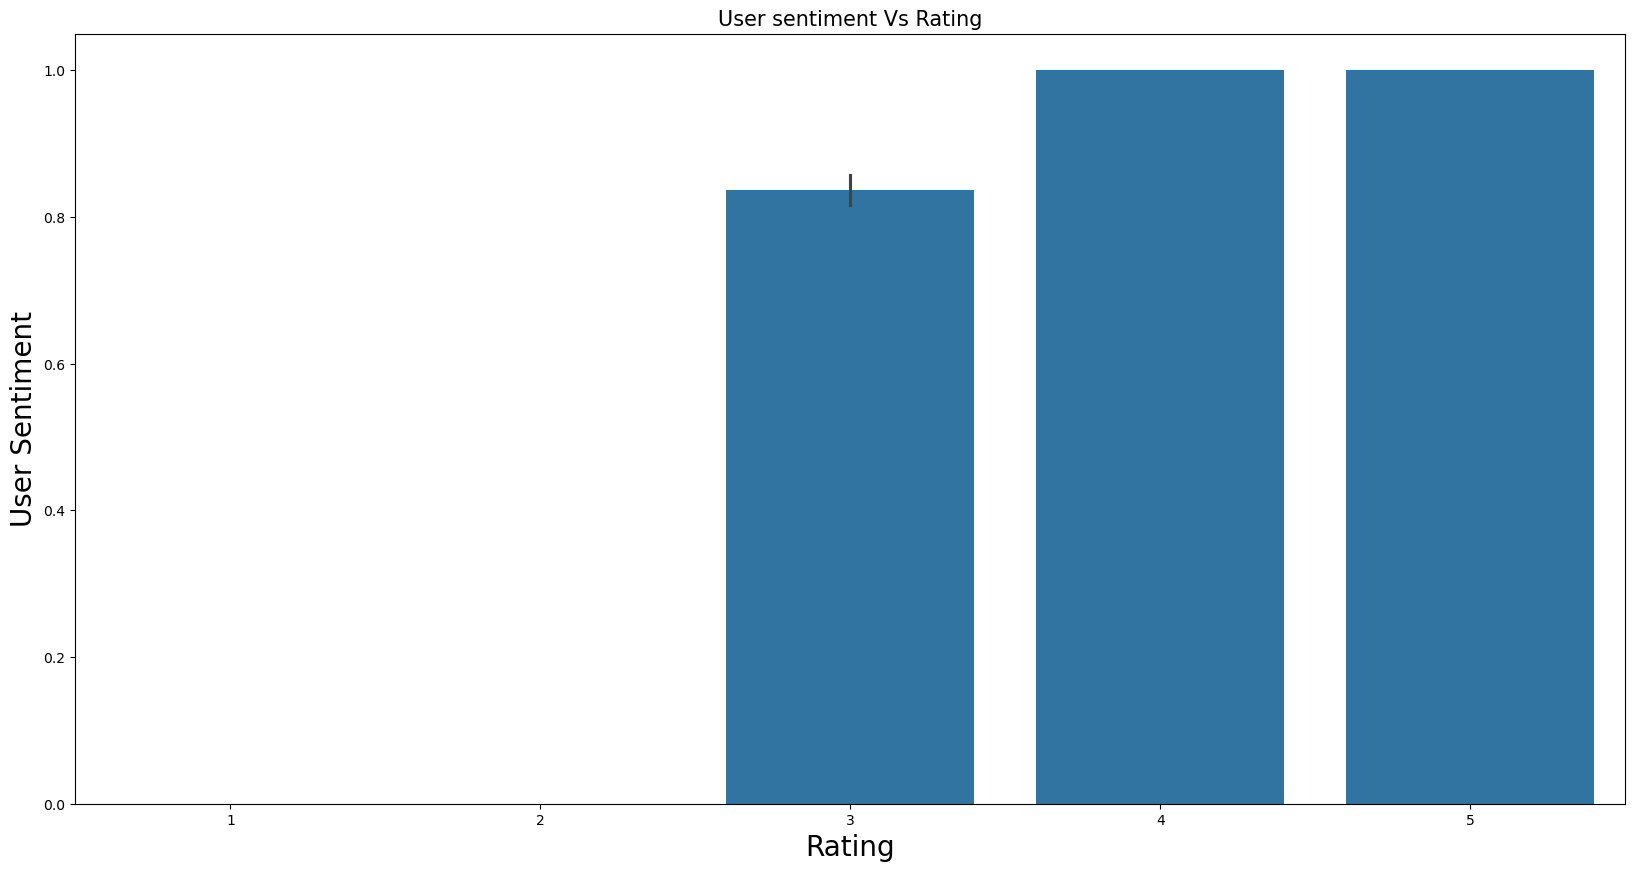

In [67]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data =data,x='reviews_rating', y='user_sentiment')
ax.set_xlabel('Rating',size = 20)
ax.set_ylabel('User Sentiment',size = 20)
ax.set_title( "User sentiment Vs Rating",size = 15)
plt.show()

Now user sentiment is positive only for higher ratings

<Axes: xlabel='brand'>

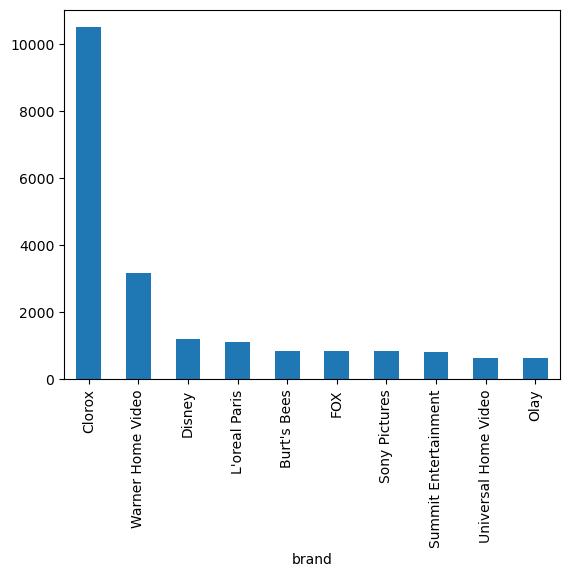

In [70]:
data[data['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='brand'>

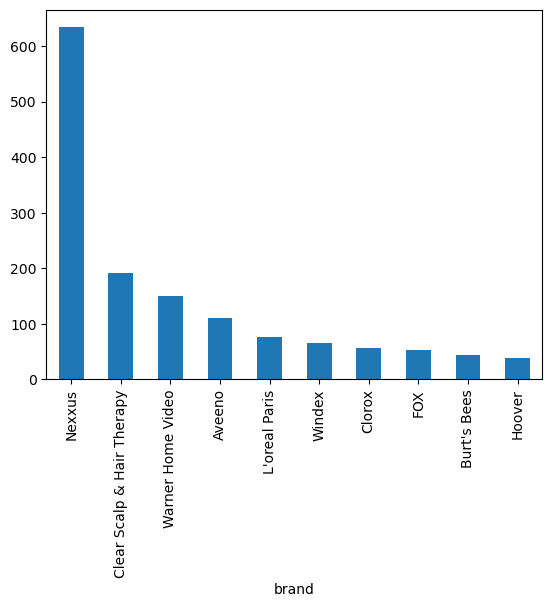

In [72]:
data[data['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar')

#### Saving the the data 

In [76]:
pickle.dump(data, open("data_cleaned.pkl", 'wb'))

### Building the recommendation system

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29936 non-null  object
 1   brand                 29936 non-null  object
 2   categories            29936 non-null  object
 3   manufacturer          29795 non-null  object
 4   name                  29936 non-null  object
 5   reviews_date          29896 non-null  object
 6   reviews_didPurchase   15931 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        29936 non-null  int64 
 9   reviews_text          29936 non-null  object
 10  reviews_title         29747 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  166 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29936 non-null  int64 
dtypes: int64(2), object(13)
memory usage: 3.7

In [81]:
data_reco = data[["id", "name", "reviews_rating", "reviews_username"]]

In [83]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_reco, test_size=0.30, random_state=31)

In [84]:
print(train.shape)
print(test.shape)

(20955, 4)
(8981, 4)


In [87]:
df_pivot = pd.pivot_table(train,index='reviews_username', columns = 'id', values = 'reviews_rating')


In [89]:
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10ten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11111111aaaaaaaaaaaaaaaaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [92]:
dummy_train = train.copy()

In [94]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [96]:
# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table(dummy_train,index='reviews_username', columns = 'id', values = 'reviews_rating').fillna(1)

In [98]:
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1085,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10ten,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11111111aaaaaaaaaaaaaaaaa,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## User-User based similarity

# Using adjusted cosine

In [102]:
from sklearn.metrics.pairwise import pairwise_distances



In [104]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [106]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


User-User prediction

In [108]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 1.83449846,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
user_predicted_ratings.shape

(18224, 252)

In [111]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,7.609593,0.0,0.0,0.0,0.67658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.248804,0.0,1.834498,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
08dallas,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [112]:
user_final_rating.shape

(18224, 252)

In [113]:
#Find all unique users
data['reviews_username'].unique()

array(['joshua', 'dorothy w', 'rebecca', ..., 'liviasuexo', 'ktreed95',
       'kcoopxoxo'], dtype=object)

In [114]:
recommendations = user_final_rating.loc['joshua'].sort_values(ascending=False)[0:20]

In [116]:
recommendations

id
AVpf0eb2LJeJML43EVSt    4.457255
AVpfRTh1ilAPnD_xYic2    3.513338
AVpe59io1cnluZ0-ZgDU    3.513338
AVpf385g1cnluZ0-s0_t    3.061862
AVpf5Z1zLJeJML43FpB-    3.061862
AVpf5olc1cnluZ0-tPrO    3.061862
AVpfPaoqLJeJML435Xk9    2.352581
AVpf3VOfilAPnD_xjpun    1.767767
AVpf5CnILJeJML43FjaU    0.626587
AV1YGDqsGV-KLJ3adc-O    0.626587
AVpftikC1cnluZ0-p31V    0.626587
AVpfR5m0LJeJML436K3W    0.626587
AVpe41TqilAPnD_xQH3d    0.469940
AVpfOIrkilAPnD_xXgDG    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfOmKwLJeJML435GM7    0.000000
AVpfNfEMLJeJML434uf-    0.000000
AVpfNc9cLJeJML434tza    0.000000
AVpfOfIqLJeJML435D06    0.000000
Name: joshua, dtype: float64

### Evaluation User-User

In [119]:
# Find out the common users of test and train dataset.
common = test[test['reviews_username'].isin(train['reviews_username'])]
common.shape

(2022, 4)

In [120]:
common

,id,name,reviews_rating,reviews_username
10481,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,debster
19701,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,laura30
20083,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,suzweet
19708,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,krotz03
29188,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,4,toshcal
...,...,...,...,...
28972,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,3,oats4mer
10262,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,andream82
8911,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,sweetpea626
20111,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,julies12


In [128]:
common = common.drop_duplicates(subset=['reviews_username'])

In [132]:
common.shape

(1708, 4)

In [134]:
common_user_based_matrix = pd.pivot_table(common,index='reviews_username', columns = 'id', values = 'reviews_rating')

In [136]:
common_user_based_matrix

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aac06002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zapman,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zebras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [140]:
user_correlation_df.shape

(18224, 18224)

In [142]:
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.shape

(18224, 18224)

In [144]:
list_name = common['reviews_username'].tolist()

user_correlation_df.columns = df_pivot.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [146]:
user_correlation_df_1.shape

(1708, 18224)

In [148]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [150]:
user_correlation_df_3 = user_correlation_df_2.T

In [152]:
user_correlation_df_3.head()

,1234,1234asdf,37f5p,4cloroxl,aac06002,aaron,abbi,abcgator,abigail,abismomy,...,yeya,ygtz,yoadrian,yohnie1,yshan,zapman,zburt5,zebras,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aac06002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.28867513, 0.        , 0.        , ..., 1.66666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index='reviews_username', columns = 'id', values = 'reviews_rating').fillna(0)

In [158]:
dummy_test.shape

(1708, 103)

In [160]:
common_user_predicted_ratings.shape

(1708, 103)

In [162]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [164]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aac06002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [168]:
common_ = pd.pivot_table(common,index='reviews_username', columns = 'id', values = 'reviews_rating')

In [170]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [172]:

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.510508237381286


## Item-Item based recommender

In [175]:
df_item_pivot = pd.pivot_table(train,
    index='id',
    columns='reviews_username',
    values='reviews_rating'
)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
mean = np.nanmean(df_item_pivot, axis=1)
df_subtracted = (df_item_pivot.T-mean).T

In [179]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zowie,zozo0o,zpalma,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.103448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [183]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [185]:
item_predicted_ratings = np.dot((df_item_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03580569,
        0.        ],
       [0.        , 0.        , 0.01271427, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02119046, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00710285],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00710285],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00568228]])

In [186]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.009245,0.0,0.0,0.0,0.025318,0.005122,0.0,0.035806,0.000000
01impala,0.0,0.0,0.012714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004637,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.021190,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007729,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
06stidriver,0.0,0.0,0.000000,0.001521,0.0,0.0,0.0,0.001726,0.001909,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.007103
08dallas,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


## Finding recommendation for user

In [190]:
recommendations_item = item_final_rating.loc['joshua'].sort_values(ascending=False)[0:20]

In [191]:
recommendations_item

id
AVpfr5cb1cnluZ0-pZFp    0.045932
AVpe_dxlilAPnD_xSiHI    0.045616
AV1Ys0kTvKc47QAVgx1C    0.043590
AVpe_N91LJeJML43z4jD    0.038392
AVpe_pDG1cnluZ0-bjSf    0.031347
AVpe7zdzLJeJML43yp3d    0.020787
AVpe59io1cnluZ0-ZgDU    0.020259
AVpe41TqilAPnD_xQH3d    0.018898
AVpf0thK1cnluZ0-r8vR    0.017029
AVpfOIrkilAPnD_xXgDG    0.016776
AVpfRTh1ilAPnD_xYic2    0.014757
AVpfGuDrLJeJML432fDz    0.011595
AVpf5CnILJeJML43FjaU    0.011034
AVpf7LysilAPnD_xkm9G    0.009374
AVpfMpZ51cnluZ0-f_L9    0.008944
AVpfe3On1cnluZ0-lgn5    0.008742
AVpe5s3RLJeJML43x4eA    0.008593
AVpe6n2_LJeJML43yOgE    0.008279
AVpe8gsILJeJML43y6Ed    0.007757
AVpfM_ytilAPnD_xXIJb    0.005961
Name: joshua, dtype: float64

In [194]:
item_final_recommendations = pd.DataFrame({'product_id': recommendations_item.index, 'similarity_score' : recommendations_item})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfr5cb1cnluZ0-pZFp,Boraam Sonoma Kitchen Cart With Wire Brush Gra...,0.045932
19,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smooth...",0.045616
27,AV1Ys0kTvKc47QAVgx1C,Meguiar's Deep Crystal Car Wash 64-Oz.,0.043590
41,AVpe_N91LJeJML43z4jD,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,0.038392
48,AVpe_pDG1cnluZ0-bjSf,Bi-O-kleen Spray & Wipe All Purpose Cleaner,0.031347
54,AVpe7zdzLJeJML43yp3d,Ragu Roasted Garlic Parmesan Pasta Sauce,0.020787
67,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,0.020259
544,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.018898
1070,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.017029
1163,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),0.016776


## Evaluation item-item

In [197]:
common =  test[test.id.isin(train.id)]
common.shape

(8955, 4)

In [198]:
common_item_based_matrix = common.pivot_table(index='id', columns='reviews_username', values='reviews_rating')

In [199]:
item_correlation_df = pd.DataFrame(item_correlation)

In [203]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001876,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [205]:
list_name = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [207]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [209]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.01695237, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02105944, 0.        , 0.00152125, ..., 0.        , 0.0006085 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04219742],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00691744],
       [0.        , 0.        , 0.00710285, ..., 0.        , 0.00284114,
        0.        ]])

In [211]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index='id', columns='reviews_username', values='reviews_rating').fillna(0)

In [213]:
dummy_test.shape

(197, 8377)

In [214]:
common_item_predicted_ratings.shape

(197, 8377)

In [217]:
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [219]:
common_ = pd.pivot_table(common,index='id', columns='reviews_username', values='reviews_rating')

In [221]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [223]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [225]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5633113382913675


#### Clearly the RMSE of item-item based system is higher thant user-user based.We are going to use the user-user based recommender

In [228]:
import pickle

In [230]:
## Saving the user-user based recommender as pickle file
pickle.dump(user_final_rating, open("recomender.pkl", 'wb'))

## Building the classification model for sentiment analysis

In [233]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [243]:
data.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title             189
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
dtype: int64

In [360]:
data['reviews'] = data['reviews_title'] + " " + data['reviews_text']

In [362]:
data['reviews'] = data['reviews'].astype(str)

## Cleaning up the reviews for feature extraction

In [368]:
import re
import string
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", " ", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [370]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [372]:
import nltk
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dganguly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dganguly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [374]:
#Write your function to Lemmatize the texts
def lemmatize(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words("english")]
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [376]:
#Cleaning up the text of reviews
data['reviews'] = data['reviews'].apply(lambda x : cleanText(x))

In [377]:
df_reviews = pd.DataFrame(data['reviews'])
df_reviews.head(10)

,reviews
0,just awesome i love this album its very good m...
1,good good flavor this review was collected as ...
2,good good flavor
3,disappointed i read through the reviews on her...
4,irritation my husband bought this gel for us t...
5,not worth it my boyfriend and i bought this to...
6,disappointing bought this earlier today and wa...
7,not happy at all i bought this product for my ...
8,very disappointing my husband and i bought thi...
9,dont buy got as a surprise for my husband ther...


In [380]:
#Lemmatize the reviews
data['reviews'] = data['reviews'].apply(lambda x : lemmatize(x))

In [381]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\dganguly\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [384]:
df_reviews = pd.DataFrame(data['reviews'])
df_reviews.head(10)

,reviews
0,awesome love album good hip hop side current p...
1,good good flavor review collect part promotion
2,good good flavor
3,disappoint read review look buy one couple lub...
4,irritation husband buy gel us gel cause irrita...
5,worth boyfriend buy spice things bedroom highl...
6,disappoint buy earlier today excite check base...
7,happy buy product husband try impress tingle w...
8,disappoint husband buy extra fun werevboth ext...
9,dont buy get surprise husband nothing special ...


In [386]:
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [388]:
data['reviews'] = data['reviews'].apply(lambda x : remove_stopword(x))

In [390]:
df_reviews = pd.DataFrame(data['reviews'])
df_reviews.head(10)

,reviews
0,awesome love album good hip hop side current p...
1,good good flavor review collect part promotion
2,good good flavor
3,disappoint read review look buy one couple lub...
4,irritation husband buy gel us gel cause irrita...
5,worth boyfriend buy spice things bedroom highl...
6,disappoint buy earlier today excite check base...
7,happy buy product husband try impress tingle w...
8,disappoint husband buy extra fun werevboth ext...
9,dont buy get surprise husband nothing special ...


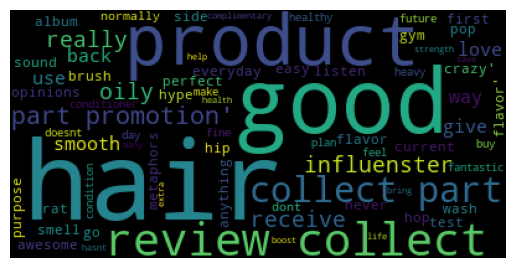

In [392]:
from wordcloud import WordCloud
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
text = data['reviews'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Find the top unigrams,bigrams and trigrams by frequency among all the reviews after processing the text.

In [397]:
text = " ".join(text)

In [399]:
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
unigram_freq = Counter(tokens)

In [401]:
#Print the top 10 words in the unigram frequency
unigram_freq.most_common(10)

[('great', 14896),
 ('use', 13709),
 ('love', 13029),
 ('product', 10723),
 ('review', 9494),
 ('movie', 9386),
 ('part', 9183),
 ('clean', 8870),
 ('collect', 8768),
 ('promotion', 8744)]

In [403]:
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)

In [405]:
#Print the top 10 words in the bigram frequency
bigram_freq.most_common(10)

[(('review', 'collect'), 8740),
 (('collect', 'part'), 8740),
 (('part', 'promotion'), 8740),
 (('clorox', 'wipe'), 2838),
 (('great', 'product'), 1918),
 (('great', 'movie'), 1689),
 (('easy', 'use'), 1541),
 (('promotion', 'great'), 1368),
 (('love', 'clorox'), 1220),
 (('promotion', 'love'), 1134)]

In [407]:
trigrams = list(ngrams(tokens, 3))
trigram_freq = Counter(trigrams)

In [409]:
trigram_freq.most_common(30)

[(('review', 'collect', 'part'), 8740),
 (('collect', 'part', 'promotion'), 8740),
 (('part', 'promotion', 'great'), 1368),
 (('part', 'promotion', 'love'), 1134),
 (('part', 'promotion', 'clorox'), 965),
 (('love', 'clorox', 'wipe'), 607),
 (('promotion', 'great', 'product'), 605),
 (('clorox', 'disinfect', 'wipe'), 561),
 (('use', 'clorox', 'wipe'), 558),
 (('promotion', 'clorox', 'wipe'), 537),
 (('clean', 'review', 'collect'), 451),
 (('please', 'bring', 'back'), 435),
 (('product', 'review', 'collect'), 313),
 (('movie', 'great', 'movie'), 310),
 (('bring', 'back', 'old'), 303),
 (('use', 'review', 'collect'), 296),
 (('part', 'promotion', 'awesome'), 296),
 (('part', 'promotion', 'best'), 294),
 (('great', 'product', 'love'), 283),
 (('part', 'promotion', 'easy'), 261),
 (('great', 'movie', 'great'), 261),
 (('clorox', 'wipe', 'love'), 255),
 (('love', 'use', 'clorox'), 246),
 (('part', 'promotion', 'good'), 241),
 (('back', 'old', 'formula'), 234),
 (('promotion', 'love', 'love'

#### The n-grams shows most reviews are of positive sentiment

#### Feature extraction

In [412]:
X = data['reviews']
Y = data['user_sentiment']

In [416]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [418]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.95, min_df=2, 
                                   ngram_range=(1,2))

In [428]:
X_train_tfidf = tfidf_vectorizer.fit_transform(data['reviews'])

In [422]:
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'act' 'action' 'actors' 'actually'
 'add' 'age' 'ago' 'amaze' 'apply' 'area' 'areas' 'ask' 'away' 'awesome'
 'awesome movie' 'awesome product' 'awful' 'baby' 'bad' 'bag' 'balm'
 'base' 'bathroom' 'bathroom kitchen' 'bathrooms' 'beautiful' 'begin'
 'believe' 'best' 'best buy' 'best product' 'better' 'big' 'bite' 'black'
 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle' 'box' 'boys' 'brand'
 'break' 'bring' 'bring cocoa' 'bring old' 'brown' 'burts' 'buy'
 'canister' 'car' 'care' 'carpet' 'carry' 'cast' 'cd' 'chair' 'change'
 'character' 'children' 'chili' 'chip' 'classic' 'classroom' 'clay'
 'clean' 'clean bathroom' 'clean disinfect' 'clean fresh' 'clean great'
 'clean house' 'clean kitchen' 'clean love' 'clean mess' 'clean product'
 'clean review' 'clean smell' 'clean use' 'clean wipe' 'cleaner' 'cleanup'
 'clear' 'clorox' 'clorox disinfect' 'clorox products' 'clorox wipe'
 'close' 'clothe' 'cocoa' 'cold' 'collect' 'collect promotion'
 'collection

In [430]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, Y, random_state=42, test_size=0.25)

In [435]:
#Handling class imbalance using SMPTE
from imblearn.over_sampling import SMOTE

In [437]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#### Classification model training

In [451]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [465]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr.fit(X_train,y_train)
y_res = lr.predict(X_test)
print("Train Accuracy :", accuracy_score(y_train, lr.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, lr.predict(X_test)))
print("Test Precision :", metrics.precision_score(y_test, lr.predict(X_test)))
print("Test Recall:", metrics.recall_score(y_test, lr.predict(X_test)))
print("Test ROC score:", metrics.roc_auc_score(y_test, lr.predict(X_test)))
print("Classification report", metrics.classification_report(y_test, lr.predict(X_test)))


Train Accuracy : 0.939144972534034
Test Accuracy : 0.9170229823623731
Test Precision : 0.9883471327813554
Test Recall: 0.9220426262337291
Test ROC score: 0.8839422056117936
Classification report               precision    recall  f1-score   support

           0       0.43      0.85      0.57       493
           1       0.99      0.92      0.95      6991

    accuracy                           0.92      7484
   macro avg       0.71      0.88      0.76      7484
weighted avg       0.95      0.92      0.93      7484



In [473]:
# Decision tree classifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
print("Train Accuracy :", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, dt.predict(X_test)))
print("Test Precision :", metrics.precision_score(y_test, dt.predict(X_test)))
print("Test Recall:", metrics.recall_score(y_test, dt.predict(X_test)))
print("Test ROC score:", metrics.roc_auc_score(y_test, dt.predict(X_test)))
print("Classification report", metrics.classification_report(y_test, dt.predict(X_test)))

Train Accuracy : 0.9966085502746597
Test Accuracy : 0.925040085515767
Test Precision : 0.9729332156516622
Test Recall: 0.94607352310113
Test ROC score: 0.7864241854856563
Classification report               precision    recall  f1-score   support

           0       0.45      0.63      0.52       493
           1       0.97      0.95      0.96      6991

    accuracy                           0.93      7484
   macro avg       0.71      0.79      0.74      7484
weighted avg       0.94      0.93      0.93      7484



In [475]:
# Random forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf.fit(X_train,y_train)
print("Train Accuracy :", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, rf.predict(X_test)))
print("Test Precision :", metrics.precision_score(y_test, rf.predict(X_test)))
print("Test Recall:", metrics.recall_score(y_test, rf.predict(X_test)))
print("Test ROC score:", metrics.roc_auc_score(y_test, rf.predict(X_test)))
print("Classification report", metrics.classification_report(y_test, rf.predict(X_test)))

Train Accuracy : 0.7944351564365895
Test Accuracy : 0.8901656867985035
Test Precision : 0.9698400609291699
Test Recall: 0.9107423830639394
Test ROC score: 0.7545598325056005
Classification report               precision    recall  f1-score   support

           0       0.32      0.60      0.42       493
           1       0.97      0.91      0.94      6991

    accuracy                           0.89      7484
   macro avg       0.65      0.75      0.68      7484
weighted avg       0.93      0.89      0.91      7484



In [479]:
import xgboost as xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic', gamma=0.5, learning_rate=0.02, max_depth=5, min_child_weight=7, n_estimators=750)
xgb_cfl.fit(X_train,y_train)
print("Train Accuracy :", accuracy_score(y_train, xgb_cfl.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, xgb_cfl.predict(X_test)))
print("Test Precision :", metrics.precision_score(y_test, xgb_cfl.predict(X_test)))
print("Test Recall:", metrics.recall_score(y_test, xgb_cfl.predict(X_test)))
print("Test ROC score:", metrics.roc_auc_score(y_test, xgb_cfl.predict(X_test)))
print("Classification report", metrics.classification_report(y_test, xgb_cfl.predict(X_test)))

Train Accuracy : 0.9422020539765942
Test Accuracy : 0.9128808123997862
Test Precision : 0.9826404751027866
Test Recall: 0.9230439136032041
Test ROC score: 0.8459032955439955
Classification report               precision    recall  f1-score   support

           0       0.41      0.77      0.54       493
           1       0.98      0.92      0.95      6991

    accuracy                           0.91      7484
   macro avg       0.70      0.85      0.74      7484
weighted avg       0.95      0.91      0.92      7484



### Logistic regression,XGBoost and DecisionTreeClassifier all has similar accuracy when it comes to test data.DecisionTreeClassifier is clearly overfitting in the test data.ROC score of Logistic regression is higher compared to other models.We are going to go with Logistic regression model based on higher accuracy on test data, comparable test and test accuracy and higher ROC score

#### Saving the logistic regression model

In [489]:
pickle.dump(lr, open("final-sentiment-classification.pkl", 'wb'))

In [491]:
pickle.dump(tfidf_vectorizer, open("tfidf-vectorizer.pkl", 'wb'))

In [487]:
pickle.dump(data, open("final_cleaned_data.pkl", 'wb'))